1. Import Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import itertools

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 50
pd.options.display.float_format = '{:.2f}'.format

2. Load Data

In [3]:
furniture = pd.read_csv('Super_Store.csv', sep=",", encoding='cp1252')
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7,0.00,14.17
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.18,9,0.20,85.31


3. Data Summarization

i.Dimension
ii. statistical summary
iii.Date Format
iv. missing data
v. correlation

In [4]:
furniture.shape

(2121, 21)

In [5]:
furniture.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.00,2121.00,2121.00,2121.00,2121.00,2121.00
mean,5041.64,55726.56,349.83,3.79,0.17,8.70
std,2885.74,32261.89,503.18,2.25,0.18,136.05
min,1.00,1040.00,1.89,1.00,0.00,-1862.31
25%,2568.00,22801.00,47.04,2.00,0.00,-12.85
50%,5145.00,60505.00,182.22,3.00,0.20,7.77
75%,7534.00,90032.00,435.17,5.00,0.30,33.73
max,9991.00,99301.00,4416.17,14.00,0.70,1013.13


In [6]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

Stock Time Stamp

In [7]:
furniture['Order Date'].min(), furniture['Order Date'].max()

('1/1/2017', '9/9/2017')

In [8]:
cols=['Row ID', 'Order ID', 'Ship Date', 'Ship Mode',  'Customer ID', 'Customer Name',
     'Segment','Country', 'City', 'State', 'Postal Code', 'Region','Product ID', 'Category',
     'Sub-Category','Product Name', 'Quantity', 'Discount', 'Profit'  ]
furniture.drop(cols, axis =1, inplace = True)
furniture = furniture.sort_values('Order Date')

In [9]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [10]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [11]:
furniture['Order Date'] = pd.to_datetime(furniture['Order Date'])
furniture.set_index('Order Date', inplace = True)
furniture.index

DatetimeIndex(['2017-01-01', '2014-01-10', '2015-01-10', '2016-01-10',
               '2014-01-11', '2016-01-11', '2017-01-12', '2014-01-13',
               '2015-01-13', '2017-01-13',
               ...
               '2014-09-07', '2015-09-07', '2017-09-07', '2014-09-08',
               '2015-09-08', '2016-09-08', '2017-09-08', '2014-09-09',
               '2016-09-09', '2017-09-09'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [12]:
furniture.sort_index(inplace = True)
furniture.head(15)

,Sales
Order Date,
2014-01-06,2573.82
2014-01-07,76.73
2014-01-10,51.94
2014-01-11,9.94
2014-01-13,879.94
2014-01-14,61.96
2014-01-16,127.10
2014-01-19,181.47
2014-01-20,1413.51


4. Time Series Analysis

i. Visualize Data
ii. sampling
iii. check stationarity
iv. decomposing

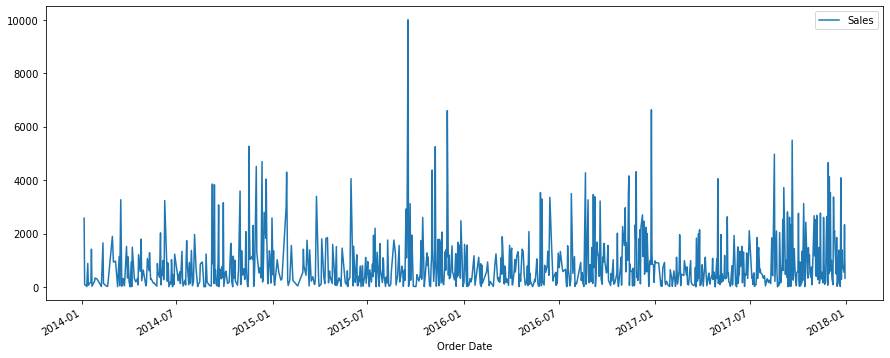

In [13]:
furniture.plot(figsize=(15,6))
plt.show()

In [14]:
y= furniture['Sales'].resample('MS').mean() # 'MS' => Monthly Start 

In [15]:
y

Order Date
2014-01-01    480.19
2014-02-01    367.93
2014-03-01    857.29
2014-04-01    567.49
2014-05-01    432.05
2014-06-01    695.06
2014-07-01    601.17
2014-08-01    457.52
2014-09-01    992.35
2014-10-01    769.02
2014-11-01    980.22
2014-12-01   1532.30
2015-01-01    978.33
2015-02-01    522.40
2015-03-01    781.24
2015-04-01    805.82
2015-05-01    625.00
2015-06-01    428.57
2015-07-01    719.71
2015-08-01    602.41
2015-09-01   1382.79
2015-10-01    632.98
2015-11-01   1286.70
2015-12-01   1049.36
2016-01-01    508.18
2016-02-01    356.87
2016-03-01    609.58
2016-04-01    695.37
2016-05-01    687.27
2016-06-01    816.91
2016-07-01    768.74
2016-08-01    734.31
2016-09-01   1135.95
2016-10-01    624.87
2016-11-01   1271.35
2016-12-01   1410.72
2017-01-01    397.60
2017-02-01    528.18
2017-03-01    544.67
2017-04-01    453.30
2017-05-01    678.30
2017-06-01    826.46
2017-07-01    562.52
2017-08-01    857.88
2017-09-01   1209.51
2017-10-01    875.36
2017-11-01   1277.82
20

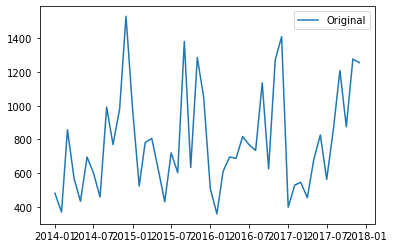

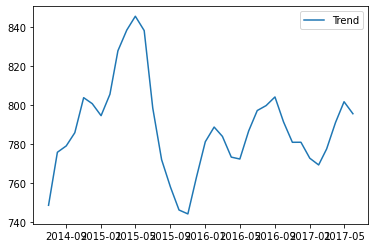

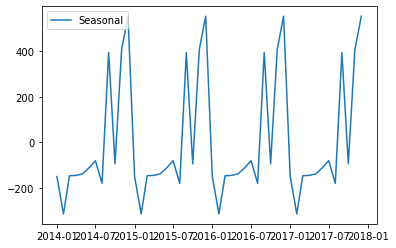

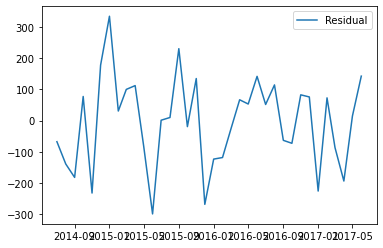

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

plt.plot(y, label='Original')
plt.legend(loc = 'best')

trend =decomposition.trend
plt.show()
plt.plot(trend, label='Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label='Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label='Residual')
plt.legend(loc = 'best')



Time series has a Seasonal pattern

Sales => low at the begining of the year and high at the end of the year

Trend => upward trend (couple of month there was down in single year) 

Check For Stationarity:

ADF: Augmented Dickey Fuller statistics

Null Hypothesis: value of a = 1 
Alternate Hypothesis: 

In [18]:
from statsmodels.tsa.stattools import adfuller

In [22]:
result = adfuller(y)
print('ADF Statistics: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s:  %.3f' % (key, value))


ADF Statistics: -5.191070
p-value: 0.000009
Critical Values:
	1%:  -3.621
	5%:  -2.944
	10%:  -2.610


-3.621 => 1% this suggest that we can reject the null hypothesis

rejecting the null hypothisis = > no unit root(time series stationary)

time series is stationary = > do not have time dependent structure.

p-value : 0.000009 (less then 0.05 thershold) => reject null hypothesis => stationary

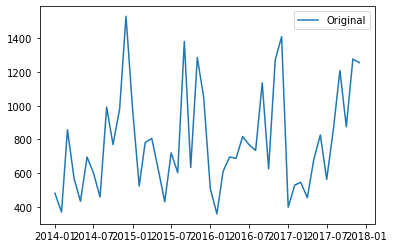

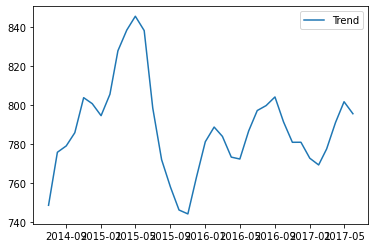

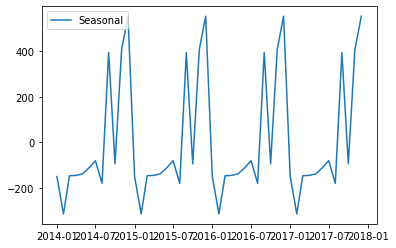

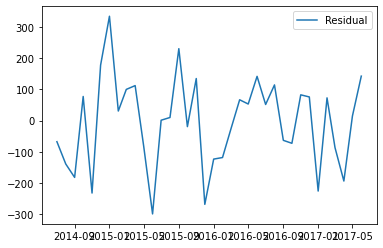

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

plt.plot(y, label='Original')
plt.legend(loc = 'best')

trend =decomposition.trend
plt.show()
plt.plot(trend, label='Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label='Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label='Residual')
plt.legend(loc = 'best')


Decomposed Components: Trends, Seasonal, Noise

Original Time series => price of the stock is unstable 

5. Time Series Forcasting using ARIMA

AR(p): Seasonality
l(d): Trend
MA(q): Residual

In [24]:
p = d = q = range(0,2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq=[(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print("Examples of Parameter combinations for Seasonal ARIMA...")
print('SARIMAX: {} x {}'. format(pdq[1],seasonal_pdq[1] ))
print('SARIMAX: {} x {}'. format(pdq[2],seasonal_pdq[2] ))
print('SARIMAX: {} x {}'. format(pdq[3],seasonal_pdq[3] ))
print('SARIMAX: {} x {}'. format(pdq[4],seasonal_pdq[4] ))

Examples of Parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (1, 0, 0) x (1, 0, 0, 12)


i. Parameter Selection

In [27]:
from pylab import rcParams
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, 
seasonal_order = param_seasonal,
enforce_stationarity = False, 
enforce_invertibility = False)
            results=mod.fit()
            print('ARIMA {} X {} 12 - AIC: {}'. format(param, param_seasonal, result.aic))
        except:
            continue
            

===>


2. Fitting ARIMA

In [28]:
mod=sm.tsa.statespace.SARIMAX(y, order=(0, 1, 1), seasonal_order = (0, 1, 1, 12 ),
                            enforce_stationarity = False, enforce_invertibility = False )
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000   4056.198     -0.000      1.000   -7951.002    7949.002
ma.S.L12      -3.2470      1.667     -1.947      0.051      -6.515       0.021
sigma2      2368.6779   9.61e+06      0.000      1.000   -1.88e+07    1.88e+07


In [29]:
results

In [31]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

ValueError: Length of endogenous variable must be larger the the number of lags used in the model and the number of observations burned in the log-likelihood calculation.

<Figure size 1152x576 with 0 Axes>

iii. Validate

iv. Calculate MSE and RMSE

v. visualizing

6. Conclusion